In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import ffmpeg
import islets
import matplotlib.pyplot as plt

import numpy as np
np.corrcoef([0,3,2],[0,1,2])

Managed to import cmovie from .movies
But, not all that's necessary. Do not depart from caiman yet.


array([[1.        , 0.65465367],
       [0.65465367, 1.        ]])

## load and save raw movie

In [3]:
import bioformats as bf

In [4]:
bf.javabridge.start_vm(class_path=bf.JARS)

In [5]:
# pathToPickle = "/data/Sandra/2019/2019_11_11/Experiment40b.lif_analysis/Series008-9/3.4_rois.pkl"
pathToPickle = "/data/Sandra/2020/2020_07_08/Experiment59c.lif_analysis/Series002-5/2020_11_12_5.6_rois.pkl"
# pathToPickle = "/data/Sandra/2019/NIKON/2019_08_21/Slice1/ryd100nM_512x512_avg8.nd2_analysis/ryd100nM_512x512_avg8/2021_03_07_7_rois.pkl"

In [6]:
regions = islets.load_regions(pathToPickle, calcInterest=False, plot=False, baremin=True)

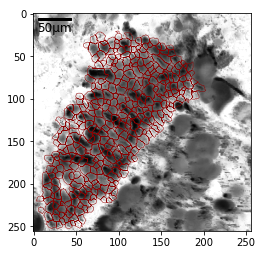

In [7]:
regions.plotEdges()

In [8]:
### deprecated
# def show_movie(m_show,
#                figScale = 1,
#                out="jshtml",
#                fps = 30,
#                saveName=None,
#                NTimeFrames=100,
#                log=True,
#                additionalPlot=None,
#                dpi=100,
#                tmax=None,
#                autoadjust=True,
#                cmapArgs=None,
#                offset=(0,0),
#                protocol=None,
#                label="",
#                time_template=lambda m,s,ms: "%2im%2is"%(m,s)
#               ):
#     from islets.numeric import rebin
    
#     from matplotlib import animation
#     if tmax is not None:
#         pass
#     m_show = m_show.copy()
#     if NTimeFrames is not None:
#         n_rebin = len(m_show)//NTimeFrames
#         if n_rebin>1:
#             m_show = rebin(m_show, n_rebin)
#     if autoadjust:
#         m_show += 1
#         for p in range(1,5):
#             baseline = np.percentile(m_show,p)
#             m_show = np.maximum(m_show, baseline)
#             if np.all(m_show>0): break
#     if log:
#         m_show = np.log(m_show)
#     figsize = np.array(m_show.shape[1:3][::-1])/100*figScale
#     ar = figsize[1]/figsize[0]
#     if protocol is not None or tmax is not None:
#         figsize[1] += .4
#     currentBackend = matplotlib.get_backend()
#     plt.switch_backend('agg')
#     fig = plt.figure(figsize=figsize,
#                      dpi=dpi,
# #                      facecolor='lightgrey'
#                     )
#     ax = fig.add_axes([0.01,0.01,.98,.98])
#     extent = (offset[0]-.5, offset[0]-.5+m_show.shape[2], offset[1]-.5+m_show.shape[1], offset[1]-.5, )
#     if cmapArgs is None:
#         im = ax.imshow(m_show[0], cmap="Greys", vmin=m_show.min(), vmax=m_show.max(), extent=extent)
#     else:
#         im = ax.imshow(m_show[0], extent=extent, **cmapArgs)
#     ax.text(1,-.06/ar, label, fontsize=6,
#              transform = ax.transAxes,
#              ha="right",
# #              family="Menlo",
#              va="bottom",
#              color="k"
#             )
#     tx = ax.text(0,-.01/ar,"",
#                  transform=ax.transAxes,
#                  ha="left",
#                  family="Monospace",
#                  va="top",
#                  color="k"
#                 )
#     if protocol is not None:
# #         tpp = ax.text(0,1+.01/ar,"", 
# #                      transform = ax.transAxes,
# #                      ha="left",
# #                      va="bottom",
# #                      color="k"
# #                      )
#     ax.set_xticks([])
#     ax.set_yticks([])
#     if tmax is not None:
#         dt = tmax/len(m_show)
#     if additionalPlot is not None:
#         additionalPlot(ax)
#     plt.close(fig)
#     def init():
#         im.set_data(m_show[0])
# #         if tmax is not None:
# #             tx.set_text("")
#         return (im,)
#     def animate(i):
#         im.set_data(m_show[i])
#         if tmax is not None:
#             time = i*dt
#             mins = int(time/60)
#             sec  = int(time-60*mins)
#             ms   = "%i"%(10*(time-60*mins-sec))
# #             tx.set_text(f"{mins}:{sec:02d}.{ms} \n")
#             tx.set_text(time_template(mins, sec, ms))
            
# #             if protocol is not None:
# #                 time = np.minimum(time, protocol.t_end.max()-1e-10)
# #                 subset = protocol.query(f"{time}>=t_begin and {time}<t_end")
# #                 comps = subset["compound"].values
# #                 concs = subset["concentration"].values
# #                 txt = " ".join(["%s:%s"%(x,c.replace(" ","")) for x,c in zip(comps, concs)])
# #                 tpp.set_text(txt)
#         return (im,)
#     anim = animation.FuncAnimation(fig, animate, init_func=init,
#                                    frames=len(m_show),
#                                    interval=1000/fps,
#                                    blit=True,
#                                   )
    
#     plt.switch_backend(currentBackend)
#     if out=="html5":
#         from IPython.display import HTML
#         return HTML(anim.to_html5_video())
#     elif out=="jshtml":
#         from IPython.display import HTML
#         return HTML(anim.to_jshtml())
#     elif out=="save" or saveName is not None:
# #         try:
# #         writer=animation.FFMpegWriter(bitrate=500)
#         anim.save(saveName,
#                   extra_args=['-vcodec', 'libx264'], 
# #                   writer=writer
#                  )
# #         except:
# #             saveName = input("please enter a valid filename. Otherwise, I'll save it as 'video.mp4'.")
# #             try: anim.save(saveName, extra_args=['-vcodec', 'libx264'])
# #             except:
# #                 saveName = "video.mp4"
# #                 anim.save(saveName, extra_args=['-vcodec', 'libx264'])
# #         return None
#     else:
#         raise ValueError("out can only be one of the following: 'html5, jshtml, save'")  

# def show_movie(m_show,
#                figScale = 1,
#                out="jshtml",
#                fps = 30,
#                saveName=None,
#                NTimeFrames=100,
#                log=True,
#                additionalPlot=None,
#                dpi=100,
#                tmax=None,
#                autoadjust=True,
#                cmapArgs=None,
#                offset=(0,0),
#                protocol=None,
#                label="",
#                time_template=lambda m,s,ms: "%2im%2is"%(m,s)
#               ):
#     from islets.numeric import rebin
    
#     from matplotlib import animation
#     if tmax is not None:
#         pass
#     m_show = m_show.copy()
#     if NTimeFrames is not None:
#         n_rebin = len(m_show)//NTimeFrames
#         if n_rebin>1:
#             m_show = rebin(m_show, n_rebin)
#     if autoadjust:
#         m_show += 1
#         for p in range(1,5):
#             baseline = np.percentile(m_show,p)
#             m_show = np.maximum(m_show, baseline)
#             if np.all(m_show>0): break
#     if log:
#         m_show = np.log(m_show)
#     currentBackend = matplotlib.get_backend()
#     plt.switch_backend('agg')
#     figsize = np.array(m_show.shape[1:3][::-1])/100*figScale
#     ar = figsize[1]/figsize[0]
#     if protocol is None:
#         fig = plt.figure(figsize=figsize,dpi=dpi,)
# #         ax = fig.add_axes([0.01,0.01,.98,.98])
#         ax = fig.add_axes([0,0,1,1])
#         ln = None
#     else:
#         compounds = protocol["compound"].unique()
#         delta_h = .05*len(compounds)
#         hspace = .05
#         rescale = 1+delta_h+hspace
#         figsize[1] *= rescale
#         fig = plt.figure(figsize=figsize,dpi=dpi,)
#         axb = fig.add_axes(np.array([0.04,(1+hspace)/rescale,.99,delta_h/rescale]))
#         for sp in axb.spines: axb.spines[sp].set_visible(False)
#         axb.set_xticks([])
#         axb.set_yticks([])
#         ic = 0
#         fontsize = figsize[0]*2.5
#         for comp, df in protocol.groupby("compound"):
#             for ii in df.index:
#                 t0,t1 = df.loc[ii].iloc[-2:]
#                 conc = df.loc[ii,"concentration"]
#                 x,y = [t0,t1,t1,t0,t0],[0,0,.8,.8,0]
#                 y = np.array(y)+ic+.1
#                 axb.fill(x,y,color="lightgrey",alpha =.3)
#                 lbl = " "+conc.lower()
#                 lbl = lbl.replace("m","")
#                 axb.text(t0,ic+.5, lbl,va="center", ha="left", fontsize=fontsize)
#                 axb.plot(x,y,color="darkgrey",)
#             axb.text(0,ic+.5,comp[:3]+" ",ha="right", va="center", fontsize=fontsize
#                     )
#             ic += 1
#         axb.set_xlim(protocol["t_end"].max()*np.array([-.05,1.05]))
#         ln = axb.axvline(0, color="C3")
#         lndata = ln.get_data()
#         ax  = fig.add_axes(np.array([0.01/rescale,0.01/rescale, 0.98, 0.98/rescale]))
# #     fig.patch.set_facecolor('#E0E0E0')
#     extent = (offset[0]-.5, offset[0]-.5+m_show.shape[2], offset[1]-.5+m_show.shape[1], offset[1]-.5, )
#     if cmapArgs is None:
#         im = ax.imshow(m_show[0], cmap="Greys", vmin=m_show.min(), vmax=m_show.max(), extent=extent)
#     else:
#         im = ax.imshow(m_show[0], extent=extent, **cmapArgs)
#     ax.set_xticks([])
#     ax.set_yticks([])
#     if additionalPlot is not None:
#         additionalPlot(ax)
#     plt.close(fig)
#     def init():
#         im.set_data(m_show[0])
#         if ln is None:
#             return (im,)
#         else:
#             ln.set_data(*lndata)
#             return (im,ln)
#     def animate(i):
#         im.set_data(m_show[i])
#         if ln is None:
#             return (im,)
#         else:
#             ln.set_data([protocol.t_end.max()/len(m_show)*i]*2, lndata[1])
#             return (im,ln)
#     anim = animation.FuncAnimation(fig, animate,
#                                    init_func=init,
#                                    frames=len(m_show),
#                                    interval=1000/fps,
#                                    blit=True,
#                                    )
    
#     plt.switch_backend(currentBackend)
#     if out=="html5":
#         from IPython.display import HTML
#         return HTML(anim.to_html5_video())
#     elif out=="jshtml":
#         from IPython.display import HTML
#         return HTML(anim.to_jshtml())
#     elif out=="save" or saveName is not None:
#         anim.save(saveName, extra_args=['-vcodec', 'libx264'], )
#     else:
#         raise ValueError("out can only be one of the following: 'html5, jshtml, save'")  

In [59]:
# def add_scale(ax, length=50):
#     x0,x1,y0,y1 = np.array([0,length,0,length*3/50])/regions.metadata.pxSize + regions.image.shape[0]*.02
#     ax.fill_between([x0,x1],[y1]*2,[y0]*2, color="k")
#     txt = "\n"+r"%gµm"%length
#     ax.text((x0+x1)/2, y1+.3*(y1-y0), txt, va="center", ha="center", size=6)

In [12]:
pathToRec = pathToPickle.split("_analysis")[0]

In [13]:
rec = islets.Recording(pathToRec)

In [14]:
ser = pathToPickle.split("_analysis")[1].split("/")[1]
# ser = rec.metadata.Name[0]
ser

'Series002-5'

In [15]:
rec.import_series(ser)

In [16]:
freq = rec.Series[ser]['metadata']["Frequency"]
freq

19.8

In [17]:
movie = islets.cmovie(rec.Series[ser]['data'], fr = freq)

In [18]:
movie.shape

(125811, 256, 256)

In [20]:
desiredFreq = 1
nRebin = int(np.round(freq/desiredFreq))
obtainedFreq = freq/nRebin
tExport = regions.time[-1] #seconds
nframes = int(tExport*obtainedFreq)
showMovie = islets.numeric.rebin(movie[:nframes*nRebin], nRebin)
# showMovie = islets.numeric.rebin(showMovie, 10,1)
showMovie = islets.cmovie(showMovie, fr=obtainedFreq)

In [21]:
from islets.Recording import saveMovie

In [25]:
saveMovie(showMovie, "raw.mp4",
          dpi=200,
          figScale=256/movie.shape[1],
          maxFreq=obtainedFreq,
          fps=obtainedFreq,
          showtime=False,
         )

0

## arrange

In [28]:
movie_time = nframes/obtainedFreq
width, height = islets.utils.get_video_dimensions("raw.mp4")
add_pad = int(max(width,height)*0.01)
th = 1
bar_h = 4*add_pad
bar_h

6351.515151515152

In [31]:
protocol = regions.protocol.copy()

In [32]:
# named colors:  https://ffmpeg.org/ffmpeg-utils.html#Color

In [33]:
protocol["color"] = ["LightGrey","white","LightGrey","white","LightGrey","white","white","LightGrey","white"]
# protocol["color"] = ["gray","white","gray","white","gray","white","white","grey","white"]
protocol.replace("glc", "glucose", inplace=True)
protocol.replace("rya", "ryanodine", inplace=True)
# protocol.replace("6 mM", "6mM", inplace=True)
# protocol.replace("Ca", "calcium", inplace=True)

In [34]:
protocol

,compound,concentration,begin,end,t_begin,t_end,color
0,glucose,8mM,NaN,26:59,0.0,1619.000000,LightGrey
1,glucose,6mM,26:59,35:19,1619.0,2119.000000,white
2,glucose,8mM,35:19,63:58,2119.0,3838.000000,LightGrey
3,glucose,6mM,63:58,77:18,3838.0,4638.000000,white
4,glucose,8mM,77:18,90:38,4638.0,5438.000000,LightGrey
5,glucose,6mM,90:38,NaN,5438.0,6352.020202,white
6,Ca,2mM,NaN,35:19,0.0,2119.000000,white
7,Ca,0.4mM,35:19,63:58,2119.0,3838.000000,LightGrey
8,Ca,2mM,63:58,NaN,3838.0,6352.020202,white


In [35]:
compounds = protocol.compound.unique()
nbars = len(compounds)
add_height = nbars*bar_h+(nbars+1)*add_pad
add_height

55

In [36]:
fontsize = bar_h*.8

In [37]:
boxes = []
wbar = width
for ic,comp in enumerate(compounds):
    ts = protocol.query(f"compound=='{comp}'")[["t_begin", "t_end"]].values.flatten()
    ts = np.unique(ts)
    y = ic*bar_h+(ic+1)*add_pad
    for ti,te in zip(ts[:-1],ts[1:]):
        x  = np.round(ti/ts.max()*wbar)
        xe = np.round(te/ts.max()*wbar)+th
        w = xe-x
        row = protocol.query(f"compound=='{comp}' and t_begin<{(ti+te)/2} and t_end>{(ti+te)/2}").iloc[0]
        text = row["concentration"]
        fill = row["color"]
        text = str(text).lower().replace("m","")
        boxes += [
            f"drawbox=x={x}:y={y}:width={w}:height={bar_h}:color='{fill}':thickness={th}:t=max",
            f"drawbox=x={x}:y={y}:width={w}:height={bar_h}:color=black:thickness={th}",
           f"drawtext=x={x+2}:y={y+bar_h/2}-text_h*.5:text='{text}':fontsize={fontsize}"
        ]
    boxes += [f"drawbox=y={y}:width={width}:height={bar_h}:color=black:thickness={th}",]
#         print (comp, ti, text, x)

with open("vidmod.txt","w") as f:
    f.write(", ".join(boxes))
!rm white.mp4; ffmpeg -t {movie_time} -f lavfi -i color=size={width}x{add_height}:color=white -r {obtainedFreq} -c:v libx264 white.mp4 -loglevel quiet
!rm boxes.mp4; ffmpeg -i white.mp4 -filter_complex_script vidmod.txt boxes.mp4 -loglevel error
!rm white.mp4; 

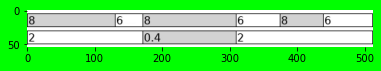

In [39]:
islets.utils.show_frame("boxes.mp4");

In [40]:
with open("vidmod.txt","w") as f:
    f.write(f"[0][1]overlay=x=t*{(width)/movie_time}[s]; [s]pad=width={width}:color=white:x={width}-iw")
!rm red.mp4; ffmpeg -t {movie_time} -f lavfi -i color=size={th+1}x{add_height}:color=Red -r {obtainedFreq} -c:v libx264 red.mp4 -loglevel quiet
!rm up.mp4; ffmpeg -i boxes.mp4 -i red.mp4 -filter_complex_script vidmod.txt up.mp4 -loglevel quiet
!rm red.mp4

rm: cannot remove 'red.mp4': No such file or directory


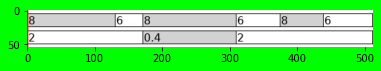

In [41]:
islets.utils.show_frame("up.mp4");

In [42]:
spacer = bar_h+2*add_pad

In [43]:
mins = int(movie_time/60)
secs = int(movie_time-60*mins)

In [44]:
mins, secs

(105, 51)

In [45]:
speedup = 20

In [46]:
d = 30
disappearing = f"'if(lt(t,{d}),1,clip(-(t-{60+d})/{d},0,1))'"
filter_arg = ", ".join([
    f"pad=height=ih+{spacer}:color=white",
#     "drawtext=text='timestamp: %{pts\:gmtime\:0\:%M\\\\m %Ss}'"+":x=0: y=h-text_h-%i: font='DejaVuSansMono':fontsize=%f"%(add_pad, fontsize),    
    "drawtext=text='timestamp: %{pts\:gmtime\:0\:%M\\\\\:%S}'"+":x=0: y=h-%i-text_h/2:fontsize=%f"%(spacer/2, fontsize),          
    "drawtext=text='total %i\:%i':x=w-text_w: y=h-%i-text_h/2:fontsize=%f"%(mins, secs, spacer/2, fontsize),    
    f"drawtext=text='[min\:sec]   @ {speedup}x speed':x={fontsize*3}: y=h-text_h/2-{spacer/2}+{int(fontsize/8)}:fontsize={fontsize}:alpha={disappearing}"
])
with open("vidmod.txt","w") as f: f.write(filter_arg)

!rm up_timed.mp4; ffmpeg -i up.mp4 -filter_complex_script vidmod.txt up_timed.mp4 -loglevel error

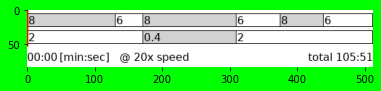

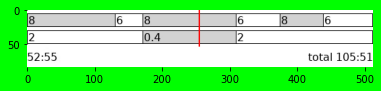

In [48]:
islets.utils.show_frame("up_timed.mp4",0);
islets.utils.show_frame("up_timed.mp4",nframes//2);

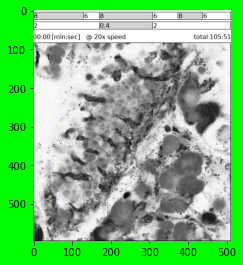

In [50]:
!rm stack.mp4; ffmpeg -i up_timed.mp4 -i raw.mp4 -filter_complex "vstack" stack.mp4 -loglevel error
islets.utils.show_frame("stack.mp4");

In [51]:
wpad_add = bar_h*4

fltrs = [
    f"pad=width=iw+{wpad_add}:color=white:x={wpad_add}",
#     "select='lt(n,10)'", # uncomment while testing so it runs much faster
]
for ic,comp in enumerate(compounds):
    y = (ic+.5)*bar_h+(ic+1)*add_pad
    if comp=="Ca": # special case to put the superscript for the ion
        fltrs += [f"drawtext=text=\'Ca\':fontcolor=black:x={wpad_add-fontsize}-text_w:fontsize={fontsize}: y={y}-text_h/2"]
        fltrs += [f"drawtext=text=\'2+\':fontcolor=black:x={wpad_add-fontsize*.2}-text_w:fontsize={fontsize*.66}: y={y-fontsize*.3}-text_h"]
    else:
        fltrs += [f"drawtext=text=\'{comp}\':fontcolor=black:x={wpad_add-fontsize*.2}-text_w:fontsize={fontsize}: y={y}-text_h/2"]
with open("vidmod.txt","w") as f:
    f.write(",".join(fltrs))
!rm stack_pad.mp4; ffmpeg -i stack.mp4 -filter_complex_script vidmod.txt stack_pad.mp4 -loglevel error

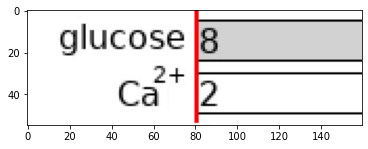

In [52]:
vs = islets.utils.show_frame("stack_pad.mp4", show=False);
plt.imshow(vs[:add_height,:wpad_add*2])

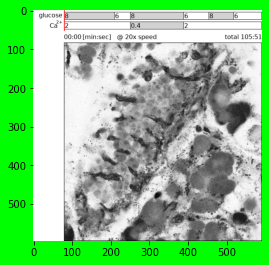

In [54]:
islets.utils.show_frame("stack_pad.mp4");

In [55]:

h_add = fontsize
w = int(wpad_add*.3)
h = int(width*.6)
ybox = int(h_add+h)
xbox = int(wpad_add*.5)
fltrs = [
#     "select='lt(n,10)'", # uncomment while testing so it runs much faster
    f"pad=color=white:h=ih+{h_add}",
    "drawtext=text='Postic et al., 2021':x=w-text_w: y=h-%f-text_h/2:fontsize=%f"%(h_add/2, fontsize*.7),
    f"pad=color=white:w=iw+{h_add}:h=ih+{h_add/2}:y={h_add/2}",
    "transpose=1",
    f"drawtext=text='intensity ⟶':x={h_add}: y={xbox-fontsize*.5}-text_h:fontsize=%f"%(fontsize),
    "transpose=2",
# [anticlockwiserotated]drawtext=fontfile=font.ttf: text='Test Text':x=100: y=50: fontsize=36: fontcolor=white:[textapplied];
# [textapplied]transpose=1" output_video
]
fltrs += [f"drawbox=x={xbox}:y=ih-{ybox}:w={w}:h={h}:t=1",]
hs = np.arange(2,h-2)
for j in hs:
    fltrs += [f"drawbox=x={xbox+2}:y=ih-{ybox-j}:w={w-4}:h=1:t=max:color=Black@{1-j/hs.max()}",]
    
fltrs += [f"setpts={1/speedup}*PTS"]
with open("vidmod.txt","w") as f:
    f.write(",".join(fltrs))
!rm final.mp4; ffmpeg -i stack_pad.mp4 -filter_complex_script vidmod.txt -r {speedup} final.mp4 -loglevel error

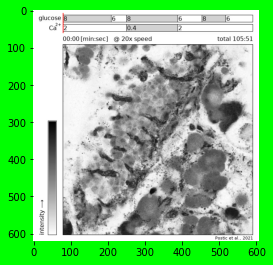

In [56]:
vs = islets.utils.show_frame("final.mp4");
# plt.imshow(vs[-100:])

In [58]:
# If we are happy with our movie, we can rename the final result into something more meaningful
!mv final.mp4 59c_annotated.mp4
# And remove the intermediate movies
!rm up.mp4 raw.mp4 boxes.mp4 stack.mp4 stack_pad.mp4 up_timed.mp4 vidmod.txt

## Unimportant Vestiges [do not run]

In [111]:
# renderLatex("Ca${}^{2{+}}$", file="ca.png", fontsize=fontsize, dpi=200)

In [112]:
# with open("vidmod.txt","w") as f:
#     f.write(f"[0][1]overlay=x={wpad_add}-overlay_w+17:y={add_height}-overlay_h+7")
# !rm stack_pad_ca.mp4; ffmpeg -i stack_pad.mp4 -i ca.png -filter_complex_script vidmod.txt stack_pad_ca.mp4 #-loglevel quiet

In [115]:
# speedup = 30
# d = speedup/2


# for t0,te in zip(allTs[:-1],allTs[1:]):
#     t = (t0+te)/2
#     annotation = ", ".join([f"{row.compound}: {row.concentration}" for _,row in protocol.query(f"t_begin<{t}<t_end").iterrows()])
#     stream = ffmpeg.drawtext(stream, annotation, y='2', x=5, fontsize=fontsize, alpha=f"if(lt(t,{t}),clip((t-{t0})/{d},0,1),clip(-(t-{te+d})/{d},0,1))", escape_text=False)
# stream = ffmpeg.setpts(stream, f"{1/speedup}*PTS")
# stream = ffmpeg.output(stream, 'output.mp4', **{'r': speedup})
# stdout, stderr = ffmpeg.run(stream, overwrite_output=True, capture_stderr=True, capture_stdout=True)

In [188]:
vpad = fontsize//6*5+5
textpad = vpad//10
filter_arg = ", ".join([
    f"pad=height=ih+{2*vpad}:color=white:y={vpad}",
    f"drawtext=text='Postic et al., 2021': x=w-text_w-{textpad*2}: y=h-text_h-{textpad}: fontsize={fontsize*2//3}: fontcolor=darkred"
])
with open("vidmod.txt","w") as f: f.write(filter_arg)

!rm mid.mp4; ffmpeg -i raw.mp4 -filter_complex_script vidmod.txt mid.mp4
# !rm mid.mp4; ffmpeg -i raw.mp4 -filter_complex_script vidmod.txt  -c:a copy mid.mp4

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

In [189]:
# regions.protocol.iloc[1,-2:] = 200, 400

In [190]:
protocol = regions.protocol.copy()
protocol

,compound,concentration,begin,end,t_begin,t_end
0,glucose,8mM,NaN,26:59,0.0,1619.000000
1,glucose,6mM,26:59,35:19,1619.0,2119.000000
2,glucose,8mM,35:19,63:58,2119.0,3838.000000
3,glucose,6mM,63:58,77:18,3838.0,4638.000000
4,glucose,8mM,77:18,90:38,4638.0,5438.000000
5,glucose,6mM,90:38,NaN,5438.0,6352.020202
6,Ca,2mM,NaN,35:19,0.0,2119.000000
7,Ca,0.4mM,35:19,63:58,2119.0,3838.000000
8,Ca,2mM,63:58,NaN,3838.0,6352.020202


If you wish something renamed, or you wish to remove spaces between number and units, now is the time.

In [192]:
allTs = protocol[['t_begin',"t_end"]].values.flatten()
allTs = np.unique(allTs)
for t0,te in zip(allTs[:-1],allTs[1:]):
    t = (t0+te)/2
    annotation = ", ".join([f"{row.compound}: {row.concentration}" for _,row in protocol.query(f"t_begin<{t}<t_end").iterrows()])
    print (f"from {t0: 4.0f}s to {te:4.0f}s annotation will be '{annotation}'")

from    0s to 1619s annotation will be 'glucose: 8mM, calcium: 2mM'
from  1619s to 2119s annotation will be 'glucose: 6mM, calcium: 2mM'
from  2119s to 3838s annotation will be 'glucose: 8mM, calcium: 0.4mM'
from  3838s to 4638s annotation will be 'glucose: 6mM, calcium: 2mM'
from  4638s to 5438s annotation will be 'glucose: 8mM, calcium: 2mM'
from  5438s to 6352s annotation will be 'glucose: 6mM, calcium: 2mM'


Examine the output above to make sure you are happy.

In [193]:
stream = ffmpeg.input('mid.mp4')
speedup = 30
d = speedup/2


for t0,te in zip(allTs[:-1],allTs[1:]):
    t = (t0+te)/2
    annotation = ", ".join([f"{row.compound}: {row.concentration}" for _,row in protocol.query(f"t_begin<{t}<t_end").iterrows()])
    stream = ffmpeg.drawtext(stream, annotation, y='2', x=5, fontsize=fontsize, alpha=f"if(lt(t,{t}),clip((t-{t0})/{d},0,1),clip(-(t-{te+d})/{d},0,1))", escape_text=False)
stream = ffmpeg.setpts(stream, f"{1/speedup}*PTS")
stream = ffmpeg.output(stream, 'output.mp4', **{'r': speedup})
stdout, stderr = ffmpeg.run(stream, overwrite_output=True, capture_stderr=True, capture_stdout=True)